In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras.models
from keras.layers.convolutional import Conv1D, ZeroPadding1D
from keras.layers.recurrent import Recurrent, LSTM, GRU
from keras.utils import plot_model
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from math import floor, ceil
from sklearn.metrics import accuracy_score
% matplotlib inline

Using TensorFlow backend.


In [4]:
def visualize(calcium, spikes=None, spikes2=None):
    t = np.arange(len(calcium)) / 100.0
    plt.hold(True)
    plt.plot(t, calcium, color='#348ABD')
    if not spikes==None:
        plt.plot(t, spikes / 2.0 - 3.2, color='black',label='gt')
    plt.yticks([])
    plt.xticks([])
    plt.ylim([-6, 3])
    plt.xlim([0,100])
    plt.tight_layout()
    plt.grid()
    plt.legend()

# training

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


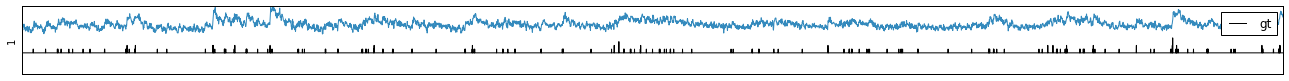

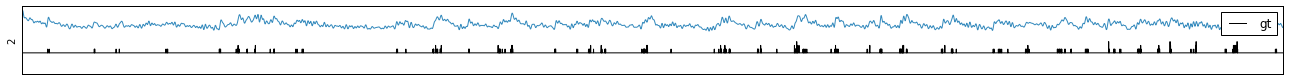

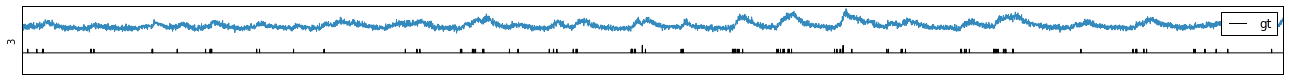

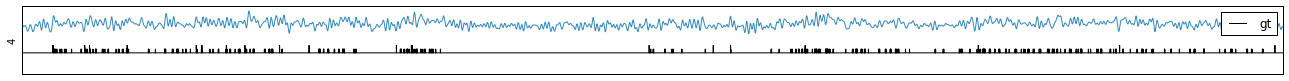

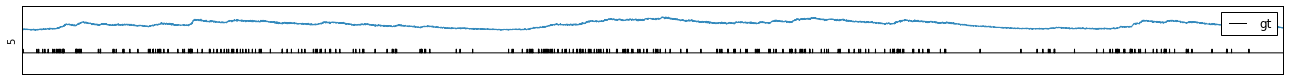

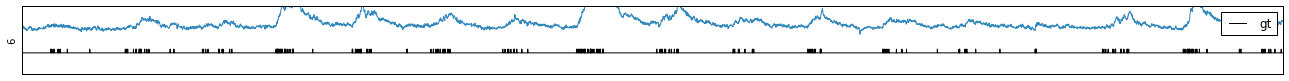

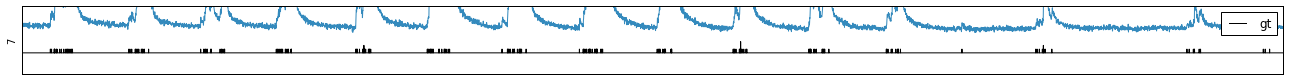

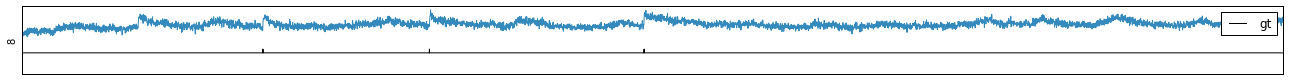

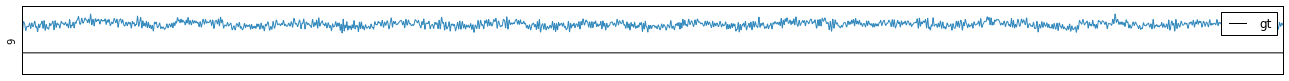

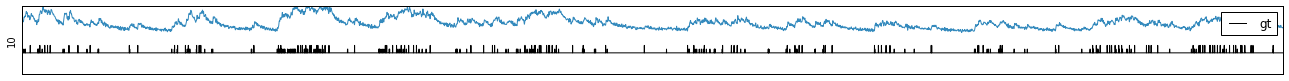

In [11]:
def visualize_train():
    N = 10
    for i in range(1,11):
        dataset = "train/"+str(i)
        x_data = pd.read_csv(dataset + '.train.calcium.csv')
        y_data = pd.read_csv(dataset + '.train.spikes.csv')    
        x_train = np.array([])
        y_train = np.array([])
        for key in ['0','1','2']:
            x_train = np.concatenate((x_train,x_data[key].dropna()))
            y_train = np.concatenate((y_train,y_data[key].dropna()))
        x_train = x_train.reshape(x_train.size,1)
        y_train = y_train.reshape(y_train.size,1)              
        plt.figure(figsize=(18, 11))  
        plt.subplot(N,1,i)
        plt.ylabel(str(i))
        visualize(x_train,y_train)

visualize_train()
plt.show()
# plt.savefig("training.png")

# testing

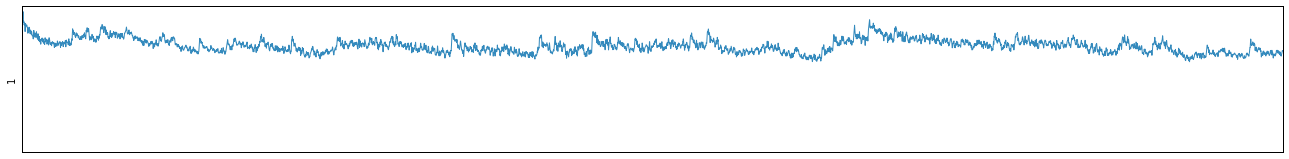

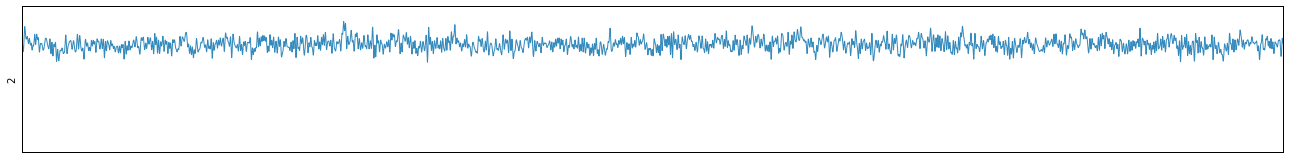

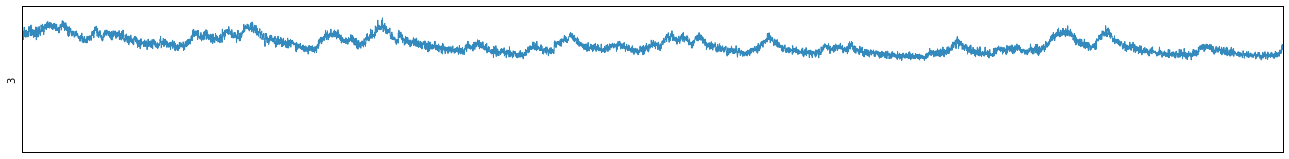

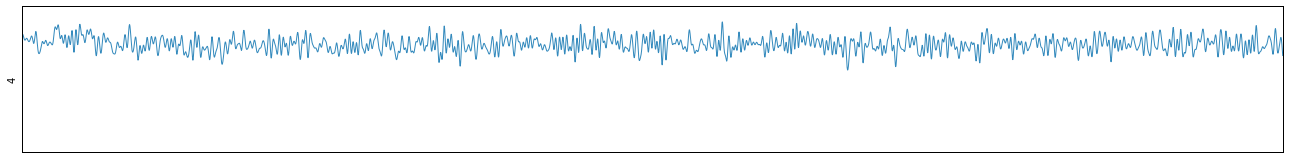

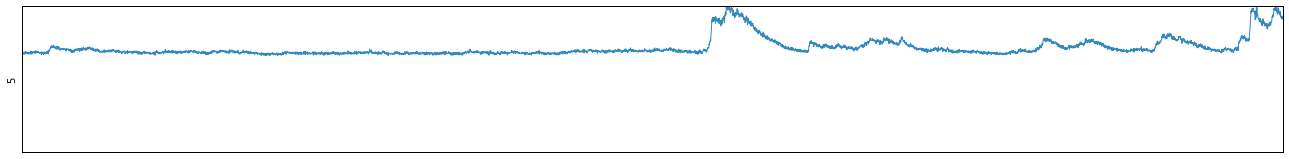

In [12]:
def visualize_test():
    N = 5
    for i in range(1,6):
        dataset = "test/"+str(i)
        x_data = pd.read_csv(dataset + '.test.calcium.csv')
        x = np.array([])
        for key in ['0','1','2']:
            x = np.concatenate((x,x_data[key].dropna()))
        x = x.reshape(x.size,1)
        plt.figure(figsize=(18, 11))  
        plt.subplot(N,1,i)
        plt.ylabel(str(i))
        visualize(x)

visualize_test()
plt.show()
# plt.savefig("training.png")